# IT44 TP4: Intégration numérique
---

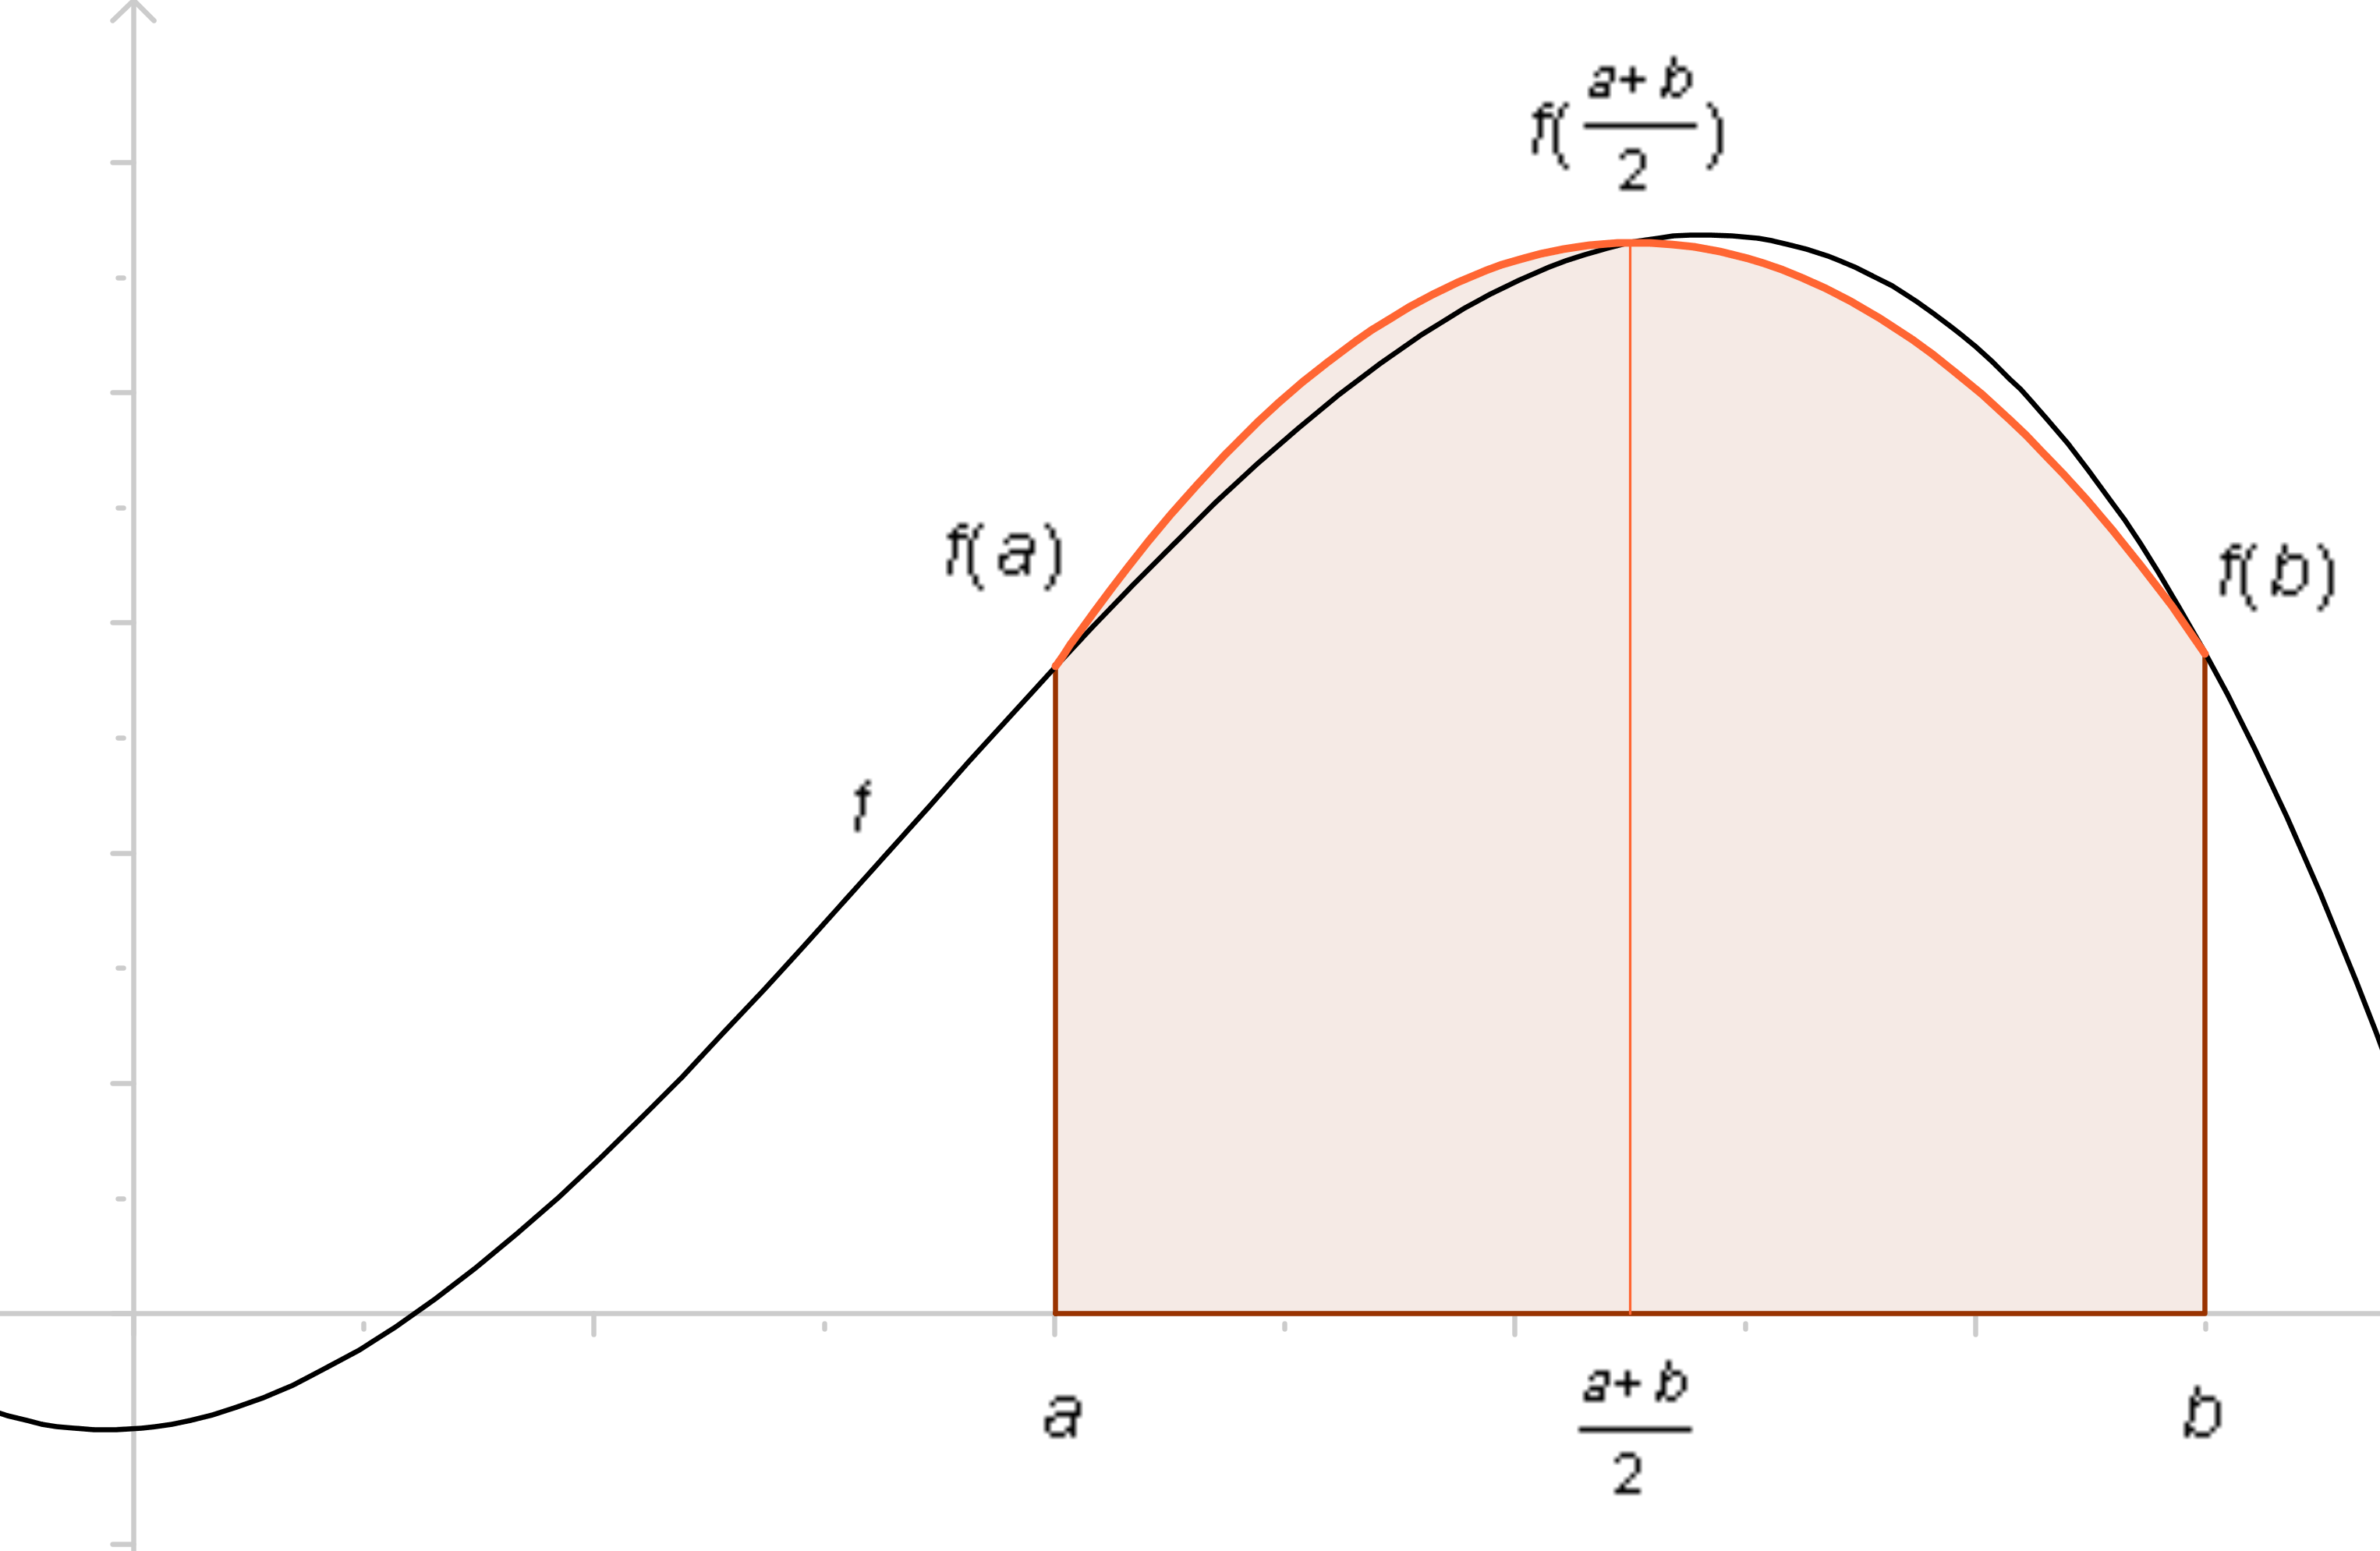<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='Simpson.png'  width="500px">
    </tr>
</table>
Dans ce TP vous allez travailler sur l'immplémentation des méthodes d'intégration classique

## Méthodes classiques

Ecrire une fonction ```integ_class(type, n, a,b,f)``` qui pour une fonction donnée, définie comme préalablement comme une fonction, un nombre de points $n+1$ et un intervalle $[a,b]$ calculer l'intégration numérique de $f$ sur $[a,b]$ par une méthode de type ```type``` (i.e. type est soit rectangle, point milieu trapèze, Simpson).

In [2]:
import math
from scipy.integrate import quad
import numpy as np

def integ_class(type, n, a, b, f):
    """
    Calcule l'intégrale d'une fonction donnée en utilisant différentes méthodes numériques.

    Arguments:
    type -- Le type de méthode (rectangle, point milieu, trapèze, Simpson).
    n -- Le nombre de subdivisions de l'intervalle [a, b].
    a -- La borne inférieure de l'intervalle d'intégration.
    b -- La borne supérieure de l'intervalle d'intégration.
    f -- La fonction à intégrer.

    Retourne:
    La valeur approximative de l'intégrale de f entre a et b.
    """
    h = (b - a) / n  # Largeur de chaque sous-intervalle
    liste_x = []

    liste_x.append(a)
    for i in range(n - 1):
        liste_x.append(liste_x[i] + h)  # xi+1 = xi + h

    #print(liste_x)  # Affiche les points x de chaque subdivision

    integral = 0

    if type == 'rectangle':
        # Méthode des rectangles
        for i in liste_x:
            integral = integral + f(i)
        integral *= h

    elif type == 'point milieu':
        # Méthode du point milieu
        for i in liste_x:
            integral = integral + f(i + h / 2)
        integral *= h

    elif type == 'trapèze':
        # Méthode des trapèzes
        somme = 0

        add = h / 2 * (f(a) + f(b))
        for i in range (1, n):
            somme = somme + f(liste_x[i])
        somme *= h
        integral = add + somme



    elif type == 'Simpson':

      add = f(a) + f(b)
      partA = 0
      partB = 0


      for i in range(1,n):
        partA = partA + f(liste_x[i])
      partA = 2*partA

      for i in range(n):
        partB = partB + f(liste_x[i]+(h/2))
      partB = 4*partB

      integral = (h/6)*(add + partA + partB)

    else:
        print('Veuillez saisir une méthode parmi : rectangle, point milieu trapèze, Simpson')

    return integral



res, err = quad(math.sqrt, 1, 2)
print ('Integrale : ', res)


# Exemple d'utilisation avec une fonction racine de x
print('méthode des rectangle :', integ_class('rectangle', 4, 1, 2, math.sqrt))
print('méthode du milieu :', integ_class('point milieu', 4, 1, 2, math.sqrt))
print('méthode des trapèzes :', integ_class('trapèze', 4, 1, 2, math.sqrt))
print('méthode de Simpson :', integ_class('Simpson', 4, 1, 2, math.sqrt))


Integrale :  1.21895141649746
méthode des rectangle : 1.1664136289184448
méthode du milieu : 1.2193313459741975
méthode des trapèzes : 1.2181903242150818
méthode de Simpson : 1.2189510053878254


On retrouve des récultats cohérents en terme de précision des méthodes.
La méthode de Simpson se rapproche le plus de la vraie valeur de l'intégrale, suivi de la méthode du milieu, puis celle des trapèzes et enfin la moins précise, celle des rectangles

## Test de performance

On considère les trois intégrales suivantes
 $$I=\int_{0}^{\pi/2}\sin(t)dt$$
$$I=\int_{0}^1 \frac{1}{1+t^2}dt$$
$$I=\int_0^1 t^3+tdt$$

Lancer le calcul de ```integ_class()``` pour différentes valeurs de $n$. Comparer avec la valeur théorique. Quelle méthode vous semble la plus performante ?


On compare les différentes méthodes avec des n différents et pour des fonctions différentes afin de trouver quelle est la méthode la plus performante.

In [3]:
from scipy.integrate import quad
import numpy as np


res, err = quad(lambda x: math.sin(x), 0, math.pi/2)
print ('\n Integrale sin : ', res)
print('\n méthode des rectangle :', integ_class('rectangle', 4, 0, math.pi/2, math.sin))
print('méthode du milieu :', integ_class('point milieu', 4, 0, math.pi/2, math.sin))
print('méthode des trapèzes :', integ_class('trapèze', 4, 0, math.pi/2, math.sin))
print('méthode de Simpson :', integ_class('Simpson', 4, 0, math.pi/2, math.sin))


res, err = quad(lambda x: x ** 3 + x, 0, 1)
print ('\n\n Integrale t**3 + x : ', res)
print('\nméthode des rectangle :', integ_class('rectangle', 4, 0, 1, lambda x: x ** 3 + x))
print('méthode du milieu :', integ_class('point milieu', 4, 0, 1, lambda x: x ** 3 + x))
print('méthode des trapèzes :', integ_class('trapèze', 4, 0, 1, lambda x: x ** 3 + x))
print('méthode de Simpson :', integ_class('Simpson', 4, 0, 1, lambda x: x ** 3 + x))

res, err = quad(lambda x: 1/(1+x**2), 0, 1)
print ('\n\n integrale 1/(1+t**2 ) : ', res)
print("\n____________n = 5___________________")
print('méthode des rectangle :', integ_class('rectangle', 5, 0, 1,lambda x: 1/(1+x**2)))
print('méthode du milieu :', integ_class('point milieu', 5, 0, 1, lambda x: 1/(1+x**2)))
print('méthode des trapèzes :', integ_class('trapèze', 5, 0, 1, lambda x: 1/(1+x**2)))
print('méthode de Simpson :', integ_class('Simpson', 5, 0, 1, lambda x: 1/(1+x**2)))
print("\n____________n = 6___________________")
print('méthode des rectangle :', integ_class('rectangle', 6, 0, 1,lambda x: 1/(1+x**2)))
print('méthode du milieu :', integ_class('point milieu', 6, 0, 1, lambda x: 1/(1+x**2)))
print('méthode des trapèzes :', integ_class('trapèze', 6, 0, 1, lambda x: 1/(1+x**2)))
print('méthode de Simpson :', integ_class('Simpson', 6, 0, 1, lambda x: 1/(1+x**2)))



 Integrale sin :  0.9999999999999999

 méthode des rectangle : 0.7907662601234133
méthode du milieu : 1.0064545427995637
méthode des trapèzes : 0.9871158009727754
méthode de Simpson : 1.0000082955239677


 Integrale t**3 + x :  0.7499999999999999

méthode des rectangle : 0.515625
méthode du milieu : 0.7421875
méthode des trapèzes : 0.765625
méthode de Simpson : 0.75


 integrale 1/(1+t**2 ) :  0.7853981633974484

____________n = 5___________________
méthode des rectangle : 0.8337315284527475
méthode du milieu : 0.7862314660008319
méthode des trapèzes : 0.7837315284527475
méthode de Simpson : 0.7853981534848038

____________n = 6___________________
méthode des rectangle : 0.8259074332844825
méthode du milieu : 0.7859768568056095
méthode des trapèzes : 0.7842407666178158
méthode de Simpson : 0.7853981600763449


On remarque que la précision des méthodes est la même qu'avant. On remarquee également qu'en augmentant la taille de n, on augmente la précision  de la méthode.
La méthode la plus performante reste la méthode de Simpson

## Donner des représentations graphiques des calculs précédents

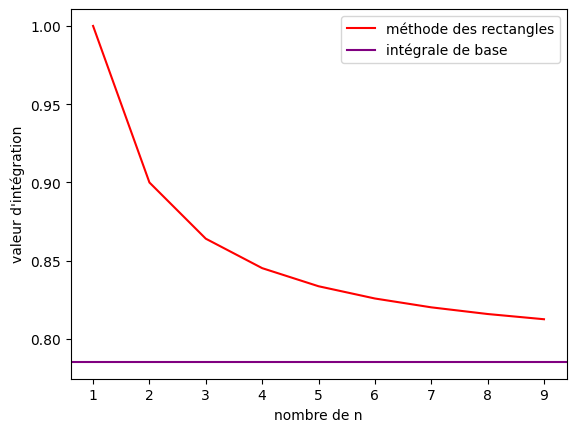

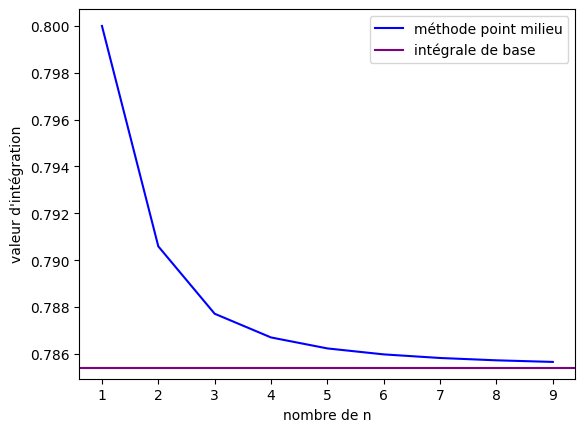

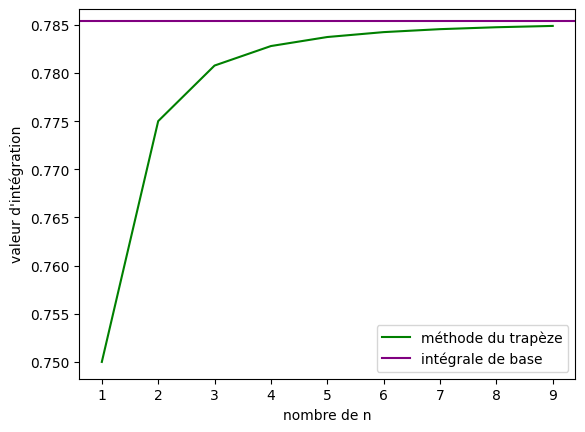

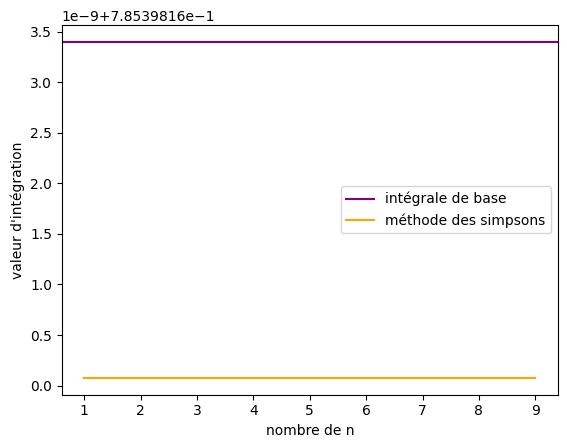

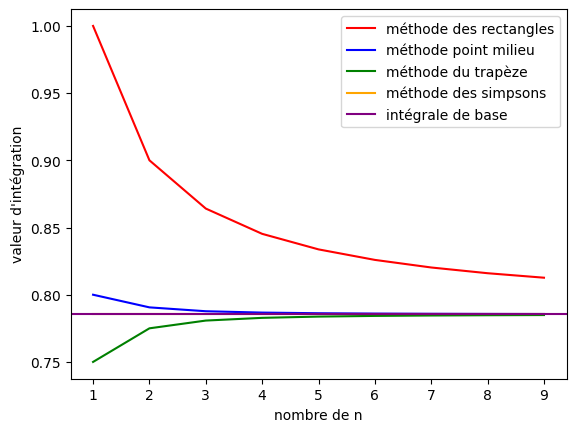

In [7]:
import matplotlib.pyplot as plt

x = []
y = []
ya = []
yb = []
yc = []

for i in range(1,10):
  x.append(i)
  y.append(integ_class('rectangle', i, 0, 1,lambda x: 1/(1+x**2)))

for i in range(1,10):
  ya.append(integ_class('point milieu', i, 0, 1, lambda x: 1/(1+x**2)))

for i in range(1,10):
  yb.append(integ_class('trapèze', i, 0, 1, lambda x: 1/(1+x**2)))

for i in range(1,10):
  yc.append(integ_class('Simpson', 6, 0, 1, lambda x: 1/(1+x**2)))


plt.plot(x,y, color='red', label='méthode des rectangles')
res, err = quad(lambda x: 1/(1+x**2), 0, 1)
valeur_y = res
plt.axhline(y=valeur_y, color='purple', label='intégrale de base')
plt.xlabel('nombre de n')
plt.ylabel('valeur d\'intégration')
plt.legend()
plt.show()

plt.plot(x,ya, color='blue', label='méthode point milieu')
plt.axhline(y=valeur_y, color='purple', label='intégrale de base')
plt.xlabel('nombre de n')
plt.ylabel('valeur d\'intégration')
plt.legend()
plt.show()

plt.plot(x,yb, color='green', label='méthode du trapèze')
plt.axhline(y=valeur_y, color='purple', label='intégrale de base')
plt.xlabel('nombre de n')
plt.ylabel('valeur d\'intégration')
plt.legend()
plt.show()

plt.axhline(y=valeur_y, color='purple', label='intégrale de base')
plt.plot(x,yc, color='orange', label='méthode des simpsons')
plt.xlabel('nombre de n')
plt.ylabel('valeur d\'intégration')
plt.legend()
plt.show()



plt.plot(x,y, color='red', label='méthode des rectangles')
plt.plot(x,ya, color='blue', label='méthode point milieu')
plt.plot(x,yb, color='green', label='méthode du trapèze')
plt.plot(x,yc, color='orange', label='méthode des simpsons')
plt.axhline(y=valeur_y, color='purple', label='intégrale de base')
plt.xlabel('nombre de n')
plt.ylabel('valeur d\'intégration')
plt.legend()
plt.show()


On affiche l'erreur de chaque méthode indépendemment, puis on affiche les 4 sur le même graphique, ce qui permet de voir visuellement quelle méthode donne des résultats les plus proches de la valeur exacte de l'intégrale.

Encore une fois, on remarque que la méthode de Simpson est toujours la plus performante avec une erreur de l'ordre de 10^-9

## Contrôle intératif de l'erreur

Etant donné une formule d'intégration numérique $I_n$ qui dépend de $n$ points pour évaluer $I=\int_a ^bf(x)dx$ et dont on sait qu'elle converge vers $I$. Ecrire une fonction qui étant donné $\epsilon>0$, détermine le plus petit $n$ tel que $E_n=|I_{n+1}-I_n|<\epsilon$. Utiliser votre fonction et les exemples ci-dessus pour expliquer/illustrer en quoi cette approche itérative permet de contrôler l'erreur de méthode.

In [ ]:
import numpy as np

def controle_erreur(f, a, b, epsilon, type):
    n = 1

    #calcul de l'intégrale à n points
    In = integ_class(type, n, a, b, f)

    #calcul de l'intégrale à n+1 points
    In_plus_1 = integ_class(type, n+1, a, b, f)

    #calcul de l'erreur entre les deux intégrales
    Erreur = abs(In_plus_1 - In)

    #tant que l'erreur est supérieure ou égale à la précision souhaitée
    while Erreur >= epsilon:
        n += 1

        #met à jour la valeur de l'intégrale précédente
        In = In_plus_1
        In_plus_1 = integ_class(type, n+1, a, b, f)

        #On recalcule l'erreur entre les deux intégrales
        Erreur = abs(In_plus_1 - In)

    return n

print(controle_erreur(lambda x: x ** 3 + x,0,1,0.00001, 'rectangle'))
print(controle_erreur(lambda x: x ** 3 + x,0,1,0.00001, 'point milieu'))
print(controle_erreur(lambda x: x ** 3 + x,0,1,0.00001, 'trapèze'))
print(controle_erreur(lambda x: x ** 3 + x,0,1,0.00001, 'Simpson'))
print("_________________\n")
#print(controle_erreur(lambda x: 1/x,1,2,0.0000000001, 'rectangle')) ## trop longue à exécuter
print(controle_erreur(lambda x: math.sqrt(x),1,2,0.0000000001, 'point milieu'))
print(controle_erreur(lambda x: math.sqrt(x),1,2,0.0000000001, 'trapèze'))
print(controle_erreur(lambda x: 1/x,1,2,0.0000000001, 'Simpson'))


316
29
37
1
_________________

496
625
21


Pour une même précision (e), en fonction de la méthode choisie (rectangle, trapèze, point milieu, simpson) il faudra un nombre de points différents. Par exemple avec e = 0.00001 :
- Rectangle, n = 316
- Point milieu, n = 29
- Trapeze, n = 37
- Simpson, n = 1

Cette fonction peut nous aider à déterminer la méthode la plus efficace pour une certaine fonction.

La méthode de simpson est la plus efficace. Toutefois, celle des points milieux semblent plus efficace que celle du trapèze, ce qui peut poser question.